# Importing all the necessary packages

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Loading the dataset

In [94]:
data=pd.read_csv(r'C:\Users\Chippy\Downloads\titanic_dataset.csv')

In [95]:
#Analyzing the data

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
#Finding number of rows and columns
data.shape

(891, 12)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Vizualizing the data


<AxesSubplot:xlabel='Survived', ylabel='count'>

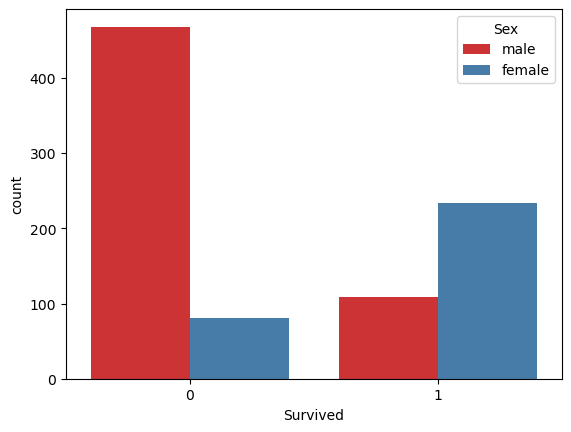

In [99]:
#Plotting male and female who survivde and didn't

sns.countplot(data=data,x='Survived',hue='Sex',palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

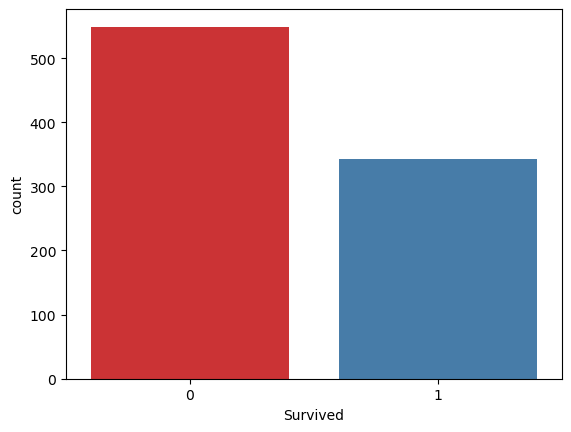

In [100]:
#plotting survived and not survived
sns.countplot(data=data,x='Survived',palette='Set1')

In [101]:
#finding the correlation

corr=data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

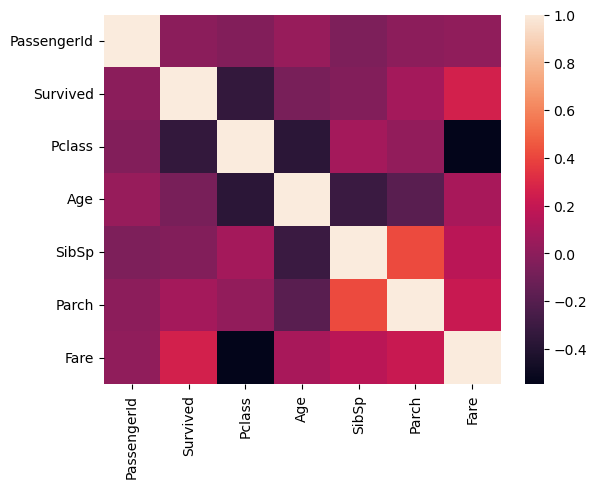

In [102]:
sns.heatmap(corr)

# EDA 

In [103]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
#Finding for missing values

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

AGE,CABIN and EMBARKED has missing value.

In [105]:
#When we look into the Cabin column we can see that majority is missing,
#hence we cannot find any mean so we will remove the cabin column

In [106]:
data_titanic=data.drop(['Cabin'],axis=1)

In [107]:
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [108]:
#Replacing missing value of age with mean value

data_titanic['Age'].fillna(data_titanic['Age'].median(),inplace=True)

In [109]:
data_titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [110]:
#Replacing missing value of EMbarked with value 'S'


data_titanic['Embarked'].fillna('S',inplace=True)

In [111]:
data_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
#Finding number of people survived and not survived

data_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [113]:
data_titanic=data_titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [114]:
#Converting categorical columns to numerical columns

from sklearn.preprocessing import LabelEncoder

In [115]:
le=LabelEncoder()
data_titanic['Sex']=le.fit_transform(data_titanic['Sex'])
data_titanic['Embarked']=le.fit_transform(data_titanic['Embarked'])

In [116]:
data_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


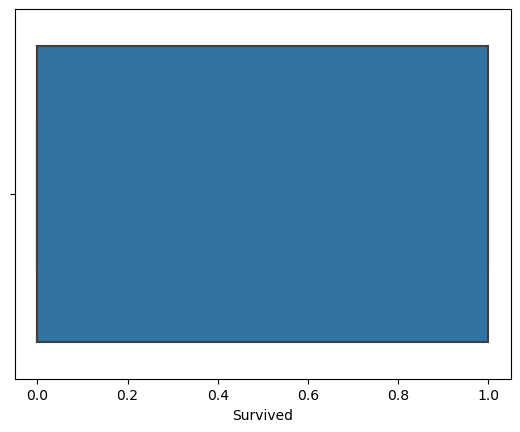

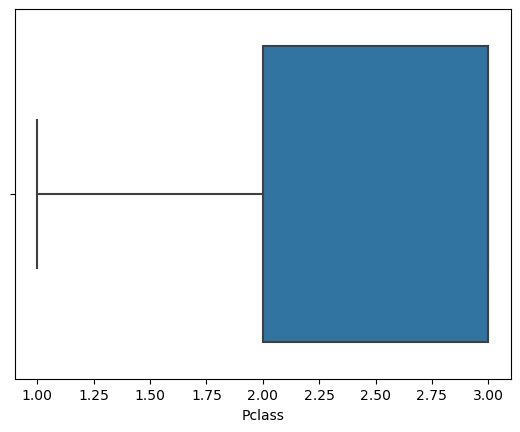

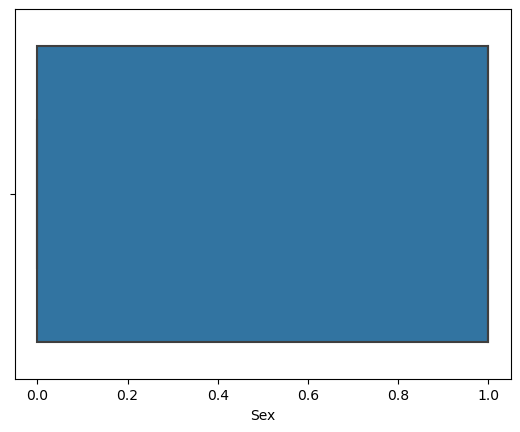

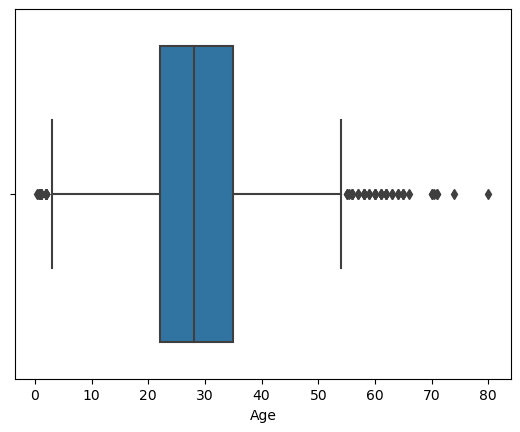

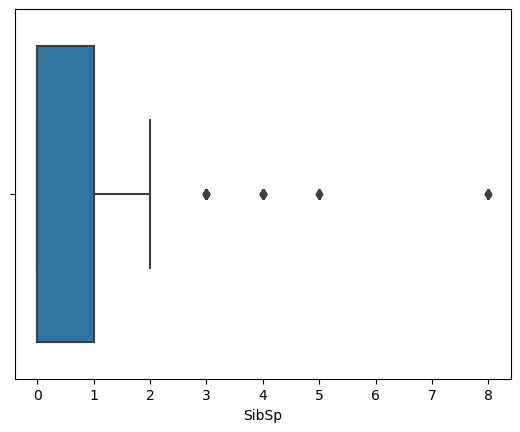

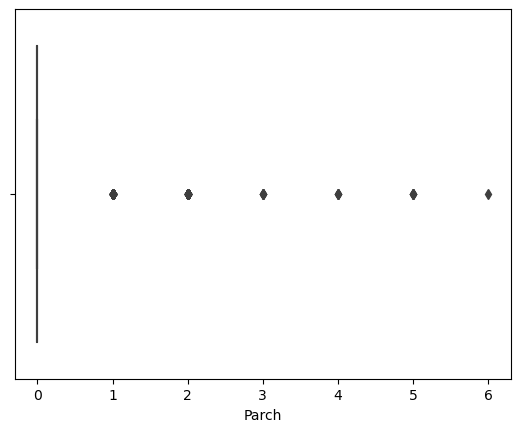

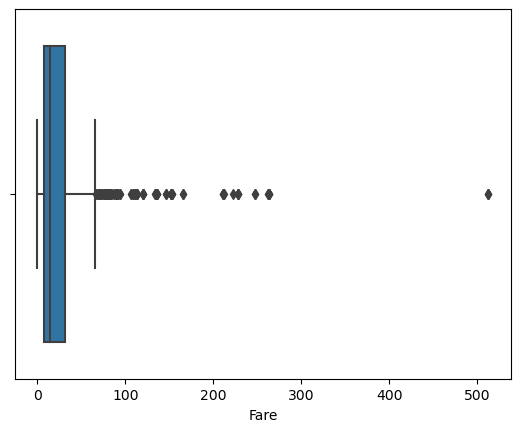

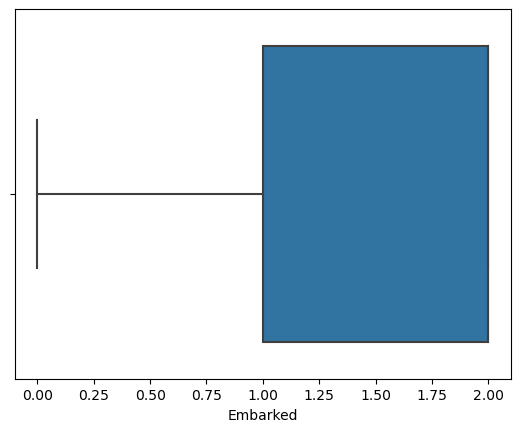

In [117]:
#Outliers

for i in data_titanic:
    sns.boxplot(x=data_titanic[i])
    plt.show()

In [118]:
from scipy import stats
IQR =stats.iqr(data_titanic.Age,interpolation='midpoint')
IQR

13.0

In [119]:
Q1=data_titanic.Age.quantile(0.25)
Q3=data_titanic.Age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.5, 54.5)

In [120]:
data_titanic.loc[data_titanic['Age']>max_limit,'Age']=np.median(data_titanic.Age)
data_titanic.loc[data_titanic['Age']<min_limit,'Age']=np.median(data_titanic.Age)

In [121]:
from scipy import stats
IQR =stats.iqr(data_titanic.Fare,interpolation='midpoint')
IQR

23.0896

In [122]:
Q1=data_titanic.Fare.quantile(0.25)
Q3=data_titanic.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [123]:
data_titanic.loc[data_titanic['Fare']>max_limit,'Fare']=np.median(data_titanic.Age)
data_titanic.loc[data_titanic['Fare']<min_limit,'Fare']=np.median(data_titanic.Age)

In [124]:
#Splitting the data into train and test

y=data_titanic['Survived']
X=data_titanic.drop(['Survived'],axis=1)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [126]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# MODELING

# 1.SVM

In [127]:
from sklearn.svm import SVC
svmclf=SVC(kernel ='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [128]:
y_pred_svm =svmclf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print ('accuracy=', accuracy_score(y_test,y_pred_svm))

accuracy= 0.7847533632286996


# 2.KNN

In [129]:
import warnings
warnings.simplefilter("ignore")


from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [130]:
metric_k

[0.7892376681614349,
 0.757847533632287,
 0.7982062780269058,
 0.8071748878923767,
 0.7892376681614349,
 0.7892376681614349,
 0.7937219730941704,
 0.8026905829596412,
 0.8026905829596412,
 0.8071748878923767,
 0.8071748878923767,
 0.8161434977578476]

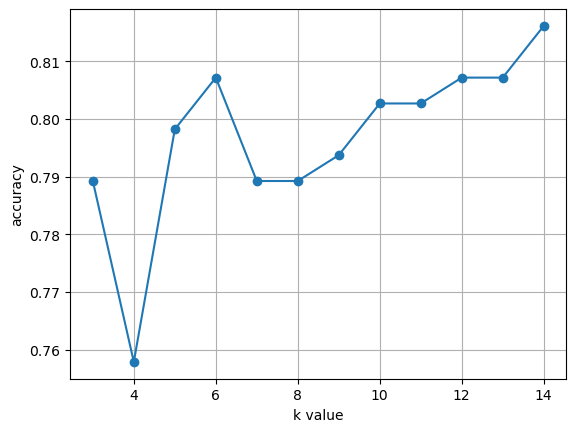

In [131]:
# Since its difficult to find out we will be plotting it

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [133]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model = classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy = ',accuracy_score(y_test,y_pred))

Accuracy =  0.7982062780269058


# CROSS VALIDATION

# 1)K-FOLD CROSS VALIDATION


# 1(a)K-FoldCross validation in SVM

In [134]:
from sklearn.model_selection import KFold
Kfold_validator =KFold(11)

In [135]:
for train_index,test_index in Kfold_validator.split(X,y):
    print('Training index',train_index)
    print('Testing index',test_index)

Training index [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323

In [136]:
from sklearn.model_selection import cross_val_score


cv_score = cross_val_score(svmclf,X,y,cv=Kfold_validator)
cv_score

array([0.80246914, 0.82716049, 0.77777778, 0.77777778, 0.83950617,
       0.7654321 , 0.77777778, 0.71604938, 0.79012346, 0.79012346,
       0.79012346])

In [137]:
np.mean(cv_score)

0.7867564534231201

# 1(b)K-Fold Cross validation in KNN

In [138]:
Kfold_validator_knn =KFold(10)

for train_index,test_index in Kfold_validator_knn.split(X,y):
    print('Training index',train_index)
    print('Testing index',test_index)

Training index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [139]:
cv_score_knn = cross_val_score(model,X,y,cv=Kfold_validator_knn)
cv_score_knn

array([0.62222222, 0.6741573 , 0.75280899, 0.69662921, 0.69662921,
       0.70786517, 0.75280899, 0.73033708, 0.73033708, 0.7752809 ])

In [140]:
np.mean(cv_score_knn)

0.7139076154806492

# 2.STRATIFIED K-FOLD CROSS VALIDATION



# 2(a)Stratified K-Fold Cross validation in SVM

In [141]:
from sklearn.model_selection import StratifiedKFold

skfold_validator= StratifiedKFold(n_splits=10)

In [142]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [143]:
skcv_score = cross_val_score(svmclf,X,y,cv=skfold_validator)
skcv_score

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [144]:
np.mean(skcv_score)

0.786729088639201

# 2(b)Stratified K-Fold Cross validation in KNN

In [145]:
skfold_validator_knn= StratifiedKFold(n_splits=10)

for train_index,test_index in skfold_validator_knn.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [146]:
skcv_score_knn = cross_val_score(model,X,y,cv=skfold_validator_knn)
skcv_score_knn

array([0.62222222, 0.65168539, 0.70786517, 0.74157303, 0.73033708,
       0.69662921, 0.7752809 , 0.7752809 , 0.68539326, 0.75280899])

In [147]:
np.mean(skcv_score_knn)

0.7139076154806492

In [148]:
#Showing the accuracy score of SVM model,k-fold and stratified

print('Accuracy Score SVM model : ',accuracy_score(y_test,y_pred_svm))
print('K-Fold Cross Validation Score SVM : ',np.mean(cv_score))
print('Stratified K-Fold Cross Validation Score SVM : ',np.mean(skcv_score))

Accuracy Score SVM model :  0.7847533632286996
K-Fold Cross Validation Score SVM :  0.7867564534231201
Stratified K-Fold Cross Validation Score SVM :  0.786729088639201


In [149]:
#Showing the accuracy score of SVM model,k-fold and stratified

print('Accuracy Score KNN model : ',accuracy_score(y_test,y_pred))
print('K-Fold Cross Validation Score KNN : ',np.mean(cv_score_knn))
print('Stratified K-Fold Cross Validation Score KNN : ',np.mean(skcv_score_knn))

Accuracy Score KNN model :  0.7982062780269058
K-Fold Cross Validation Score KNN :  0.7139076154806492
Stratified K-Fold Cross Validation Score KNN :  0.7139076154806492


In [152]:
#Hence, we can conclude that SVM gives the best fitting model with an accuracy of 78%.